In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

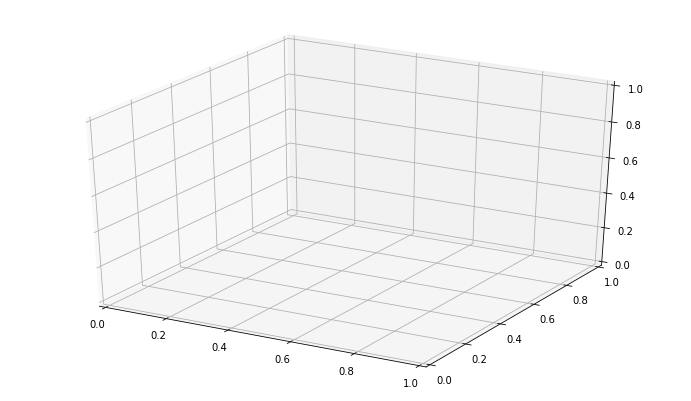

In [6]:
fig, ax = plt.subplots(subplot_kw = {"projection": "3d"}, figsize = (12,7))
uu = np.arange(0, 1, 0.025)
vv = np.arange(0, 1, 0.025)
U, V = np.meshgrid(uu, vv)

plt.show()

/home/aljiro/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


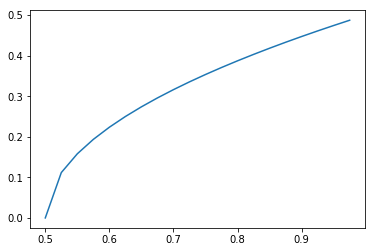

In [11]:
r = lambda u : np.sqrt(-(1 - 2*u))/2.0
plt.plot(uu, r(uu))
plt.show()

Biffurcation of equiliblium

[Text(0,0,'0.1'),
 Text(0,0,'2.1'),
 Text(0,0,'4.1'),
 Text(0,0,'6.2'),
 Text(0,0,'8.2')]

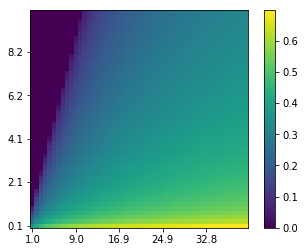

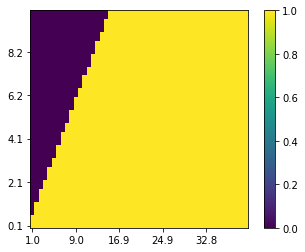

In [84]:
from scipy.optimize import fsolve
sigma = 10.0

ass = np.linspace(0.1,10,50)
bss = np.linspace(1,40,50)
X = np.zeros((len(ass),len(ass)) )
Y = np.zeros((len(ass),len(ass)) )

for i in range(len(ass)):
    for j in range(len(bss)):
        a = ass[i]
        b = bss[j]
#         f = lambda x: np.exp(-sigma*x**2) + (a*(3.0*x**2 - 1)/(b*(3.0*x**2 + 1)))
        f = lambda x: 4.0*x**2 + (a - b*np.exp(-sigma*x**2))/(a + np.exp(-sigma*x**2)) 

        x0 = np.array([1.0])
        x  = fsolve(f, x0)
        
        X[i,j] = (np.isclose(f(x), 0))*x[0]
        Y[i,j] = b/(a + b) > 0.6

plt.imshow(X)
plt.colorbar()
plt.gca().invert_yaxis()
idxs = range(0, len(bss), 10)
plt.gca().set_xticks(idxs)
plt.gca().set_xticklabels(['{0:.1f}'.format(v) for v in bss[idxs]])
plt.gca().set_yticks(idxs)
plt.gca().set_yticklabels(['{0:.1f}'.format(v) for v in ass[idxs]])

plt.figure()
plt.imshow(Y)
plt.colorbar()
plt.gca().invert_yaxis()
idxs = range(0, len(bss), 10)
plt.gca().set_xticks(idxs)
plt.gca().set_xticklabels(['{0:.1f}'.format(v) for v in bss[idxs]])
plt.gca().set_yticks(idxs)
plt.gca().set_yticklabels(['{0:.1f}'.format(v) for v in ass[idxs]])

Desingularized system

/home/aljiro/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/home/aljiro/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/home/aljiro/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """
/home/aljiro/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


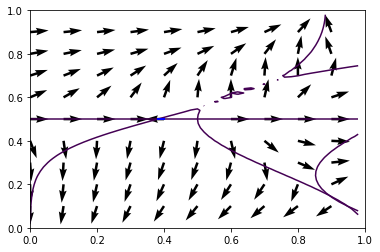

In [125]:
a = 4.0
b = 30.0
sigma = 10.0
R = lambda rho: np.exp(-sigma*rho**2)
u = lambda v, rho: 2*(2.0*rho**2 - 3.0*rho + 1.0 + (1.0 - v)*(rho - 1)/(2.0*rho)) + 1
vf = lambda v, rho: (6.0*rho**2 - 6.0*rho + 2.0 - (u(v, rho) + v)/2.0)*(-a*v + b*(1 - v)*R(rho - 1))
rhof = lambda v, rho: -(rho/2.0)*(-a*u(v, rho) + b*(1 - u(v, rho))*R(rho)) - ((rho - 1)/2.0)*(-a*v + b*(1 - v)*R(rho-1))
   
fig, ax = plt.subplots()
delta = 0.1                                                                                                              
v = np.arange(0, 1, delta)
rho = np.arange(0, 1, delta)

for i in range(len(v)):
    for j in range(len(rho)):
        ax.quiver(v[i], rho[j], vf(v[i], rho[j]), rhof(v[i], rho[j]))

delta = 0.02                                                                                                              
v = np.arange(0, 1, delta)
rho = np.arange(0, 1, delta)
V, RHO = np.meshgrid(v, rho)
plt.contour(V, RHO, vf(V, RHO), [0])
plt.contour(V, RHO, rhof(V, RHO), [0])
T = 1000
vs = np.zeros(T)
rhos = np.zeros(T)
time = np.zeros(T)
h = 0.01
vs[0] = 0.4
rhos[0] = 0.5

for i in range(T-1):
    vs[i + 1] = vs[i] + h*vf(vs[i], rhos[i])
    rhos[i + 1] = rhos[i] + h*rhof(vs[i], rhos[i])
    time[i + 1] = time[i] + h
    

ax.plot(vs, rhos, 'b', linewidth = 2.0)
ax.axis([0,1,0,1])
plt.show()